## Student Perception Analysis using Multiple Linear Regression to predict marks

### Importing libaries and understanding the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [47]:
data = pd.read_csv('StudentData.csv')
data.describe()

,Age,self study,Online class duration,expected online class duration,Total data usage,Data Online class,Marks
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,20.827586,3.366379,4.698276,4.387931,2.334483,1.051724,81.419828
std,2.254564,2.326929,1.610940,1.697935,1.388030,0.534502,9.861142
min,17.000000,0.000000,0.000000,0.000000,0.500000,0.000000,51.000000
25%,19.000000,2.000000,4.000000,4.000000,1.500000,0.700000,76.750000
50%,21.000000,3.000000,5.000000,4.000000,2.000000,1.000000,82.000000
75%,22.000000,5.000000,6.000000,6.000000,3.000000,1.050000,90.000000
max,29.000000,12.000000,8.000000,8.000000,10.000000,3.000000,96.000000


In [15]:
data.isna().sum()
# No missing values

Gender                                                                                               0
Age                                                                                                  0
Education                                                                                            0
self study                                                                                           0
Online class duration                                                                                0
expected online class duration                                                                       0
Total data usage                                                                                     0
Data Online class                                                                                    0
Internet speed                                                                                       0
Academic Outcome                                                         

In [22]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print('------------------------------')

Gender
Male      43
Female    18
Name: Gender, dtype: int64
------------------------------
Age
20    12
19    12
22    11
21    11
23     8
24     3
26     2
25     1
18     1
Name: Age, dtype: int64
------------------------------
Education
Undergraduate (or diploma)    36
Post-graduation               24
Ph D                           1
Name: Education, dtype: int64
------------------------------
self study
2.0     15
6.0     10
4.0      9
1.0      9
3.0      8
5.0      2
9.0      2
10.0     2
12.0     1
8.0      1
7.0      1
1.5      1
Name: self study, dtype: int64
------------------------------
Online class duration
5.0    28
6.0    10
4.0     7
2.0     5
7.0     3
3.0     3
4.5     2
1.0     1
8.0     1
2.5     1
Name: Online class duration, dtype: int64
------------------------------
expected online class duration
4    22
5    16
3    10
6     5
2     4
1     3
8     1
Name: expected online class duration, dtype: int64
------------------------------
Total data usage
2.0     17
1.

Text(0.5, 1.0, 'Box plot for outlier analysis')

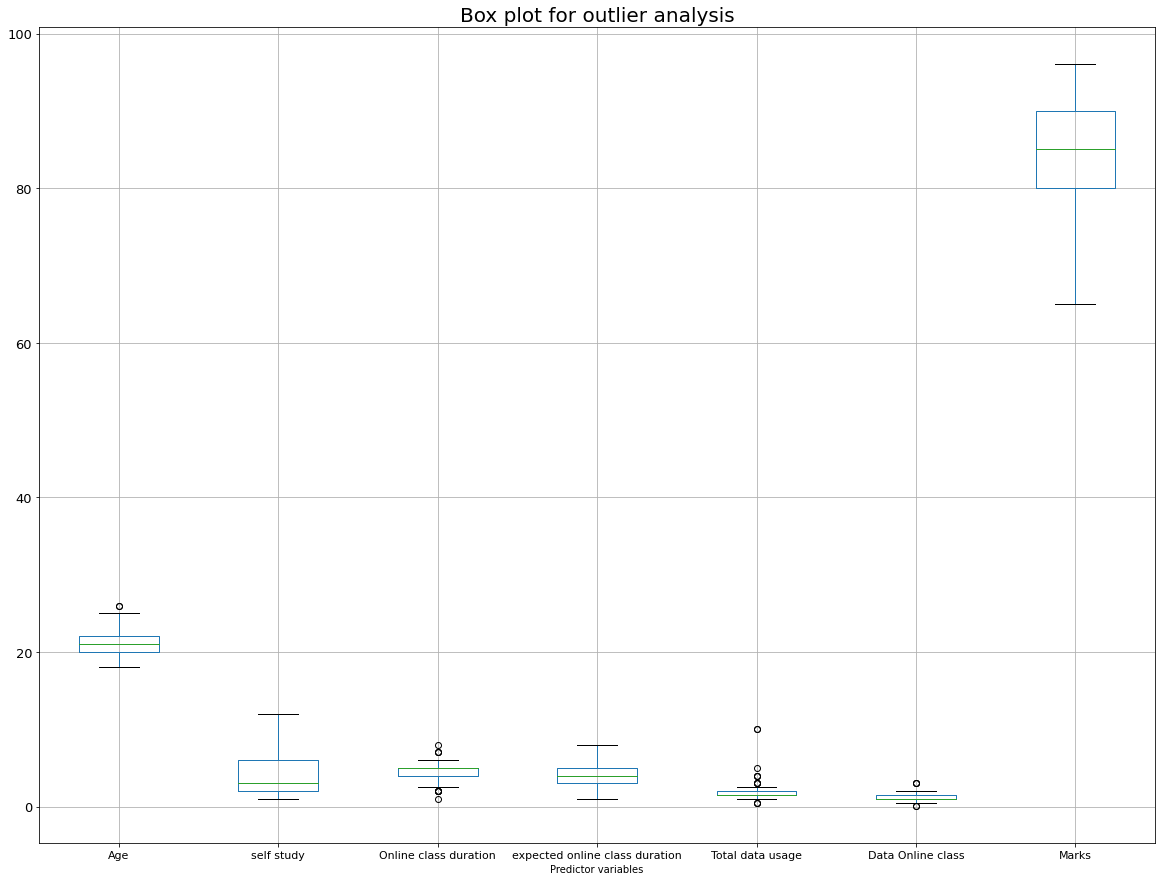

In [46]:
plt.figure(figsize=(20, 15))
data.boxplot()
plt.xticks(size=11);
plt.yticks(size=13);
plt.xlabel('Predictor variables')
plt.title('Box plot for outlier analysis', size=20)
# Inter quartile range 

In [6]:
data.Education.value_counts()

Undergraduate (or diploma)    36
Post-graduation               24
Ph D                           1
Name: Education, dtype: int64

<AxesSubplot:xlabel='expected online class duration', ylabel='Count'>

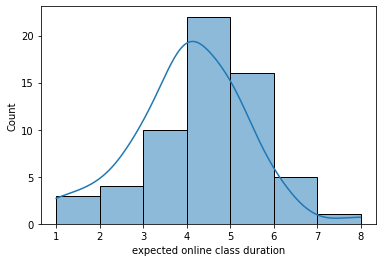

In [7]:
# data['expected online class duration'].plot(kind='hist');
sns.histplot(data['expected online class duration'], kde=True)

In [8]:
# data2 = pd.get_dummies(data['Education'], drop_first=True)
# data = pd.concat((data, data2), axis=1)

In [9]:
data.head()

,Gender,Age,Education,self study,Online class duration,expected online class duration,Total data usage,Data Online class,Internet speed,Academic Outcome,Marks,Perception on Online Classes [Better in understanding the concept .],Interest of participation in Online Classes [How actively do you participate in Online classes.],Interest of participation in Online Classes [How often you get your teachers assistance.],Interest of participation in Online Classes [How much do you use social media(including YouTube)],Interest of participation in Online Classes [Get bored in class.],Interest of participation in Online Classes [Cheat in exams]
0,Male,20,Undergraduate (or diploma),1.0,2.0,1,0.5,0.1,The worst(cannot even join the calsses),No,65.0,2 Disagree,Never,Often,Always,Always,Always
1,Male,21,Undergraduate (or diploma),2.0,4.5,4,1.0,0.8,Good(voice breaks and video stops very rarely),No,68.0,2 Disagree,Always,Often,Sometimes,Often,Often
2,Female,19,Undergraduate (or diploma),1.0,3.0,3,1.5,0.7,Good(voice breaks and video stops very rarely),No,68.0,2 Disagree,Seldom,Seldom,Sometimes,Seldom,Seldom
3,Male,19,Undergraduate (or diploma),4.0,5.0,2,1.0,1.0,The worst(cannot even join the calsses),No,70.0,3 Neutral,Seldom,Seldom,Sometimes,Sometimes,Seldom
4,Male,22,Undergraduate (or diploma),3.0,6.0,4,2.0,1.5,Have no opinion,Yes,70.0,2 Disagree,Seldom,Sometimes,Sometimes,Sometimes,Sometimes


<AxesSubplot:>

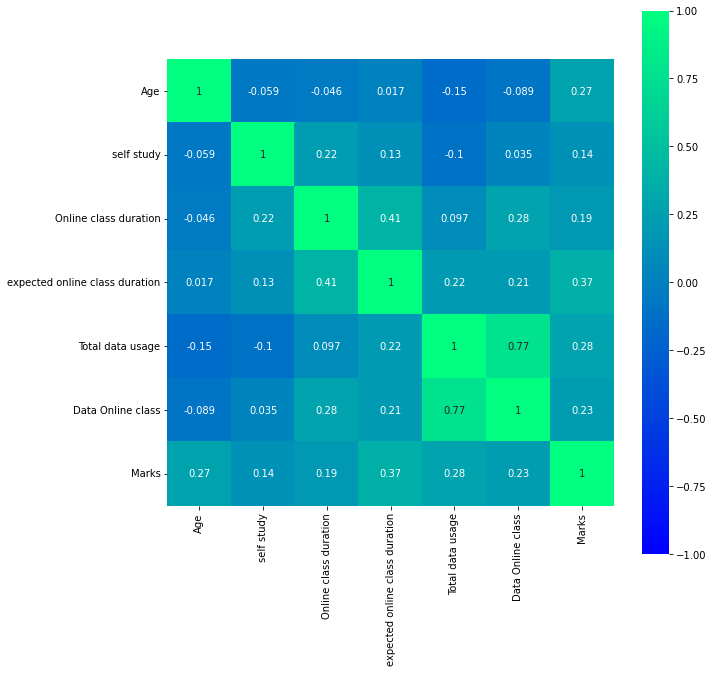

In [10]:
plt.figure(figsize=(10,10))
mask1 = np.zeros_like(data.corr())
sns.heatmap(data.corr(), annot=True, cmap='winter', mask=mask1, vmin=-1, square=True)

<AxesSubplot:xlabel='Marks', ylabel='Count'>

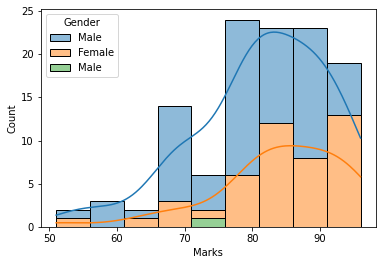

In [48]:
sns.histplot(data=data, x='Marks', kde=True, hue='Gender', multiple='stack')

<AxesSubplot:xlabel='Marks', ylabel='Count'>

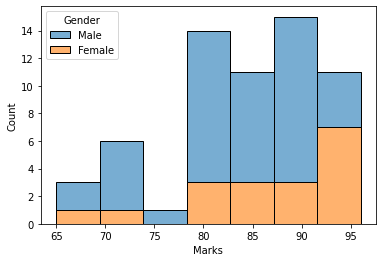

In [12]:
sns.histplot(data=data, x='Marks', hue='Gender', alpha=.6, kde=False, multiple='stack')

In [2]:
da = pd.read_csv('StudentData.csv')
da.head(10)

,Gender,Age,Education,self study,Online class duration,expected online class duration,Total data usage,Data Online class,Internet speed,Academic Outcome,Marks,Perception on Online Classes [Better in understanding the concept .],Intereost of participation in Online Classes [How actively do you participate in Online classes.],Interest of participation in Online Classes [How often you get your teachers assistance.],Interest of participation in Online Classes [How much do you use social media(including YouTube)],Interest of participation in Online Classes [Get bored in class.],Interest of participation in Online Classes [Cheat in exams]
0,Male,20,Undergraduate (or diploma),1.0,2.0,1,0.5,0.1,The worst(cannot even join the calsses),No,65.0,2 Disagree,Never,Often,Always,Always,Always
1,Male,21,Undergraduate (or diploma),2.0,4.5,4,1.0,0.8,Good(voice breaks and video stops very rarely),No,68.0,2 Disagree,Always,Often,Sometimes,Often,Often
2,Female,19,Undergraduate (or diploma),1.0,3.0,3,1.5,0.7,Good(voice breaks and video stops very rarely),No,68.0,2 Disagree,Seldom,Seldom,Sometimes,Seldom,Seldom
3,Male,19,Undergraduate (or diploma),4.0,5.0,2,1.0,1.0,The worst(cannot even join the calsses),No,70.0,3 Neutral,Seldom,Seldom,Sometimes,Sometimes,Seldom
4,Male,22,Undergraduate (or diploma),3.0,6.0,4,2.0,1.5,Have no opinion,Yes,70.0,2 Disagree,Seldom,Sometimes,Sometimes,Sometimes,Sometimes
5,Male,20,Undergraduate (or diploma),1.5,2.5,2,1.0,0.4,Bad(can join the class but voice breaks or vid...,No,70.0,1 Strongly Disagree,Always,Sometimes,Sometimes,Often,Sometimes
6,Female,21,Post-graduation,2.0,5.0,2,2.0,1.5,The best(never got any problem at all),No,70.0,2 Disagree,Sometimes,Often,Often,Always,Often
7,Male,20,Undergraduate (or diploma),1.0,5.0,3,1.0,0.9,Bad(can join the class but voice breaks or vid...,Yes,70.0,1 Strongly Disagree,Sometimes,Always,Often,Always,Always
8,Male,20,Undergraduate (or diploma),4.0,2.0,4,1.5,1.0,Good(voice breaks and video stops very rarely),No,72.0,2 Disagree,Sometimes,Sometimes,Often,Sometimes,Seldom
9,Male,21,Undergraduate (or diploma),2.0,6.0,4,2.0,2.0,Have no opinion,No,75.0,2 Disagree,Seldom,Seldom,Sometimes,Sometimes,Sometimes


(array([38.,  0., 36.,  0.,  0., 26.,  0., 15.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

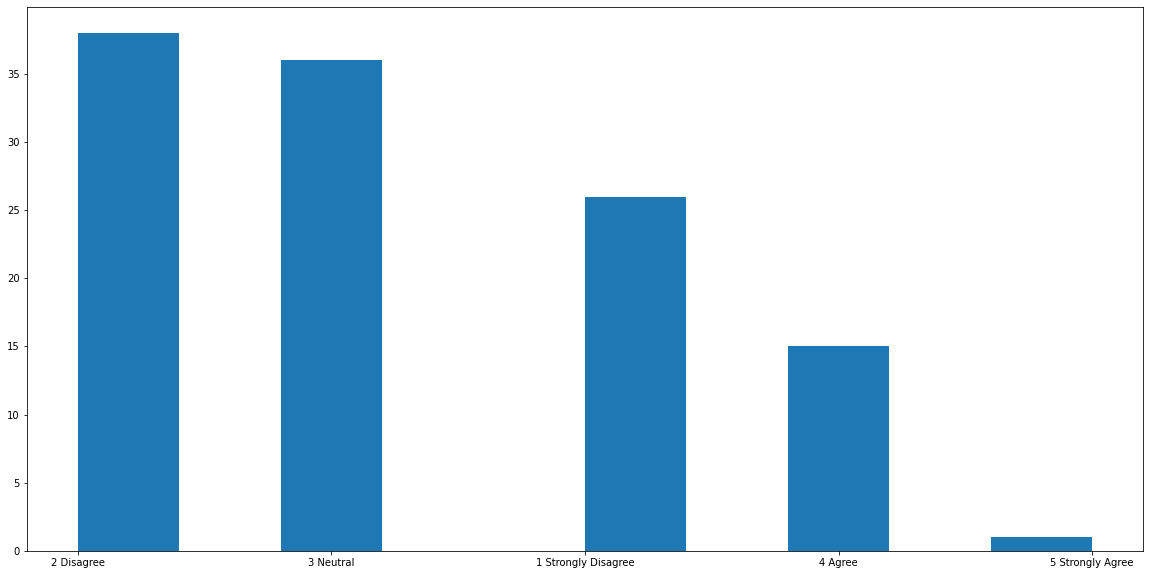

In [69]:
plt.figure(figsize=(20, 10))
plt.hist(x = data['Perception on Online Classes [Better in understanding the concept .]'], hu

In [49]:
da1 = pd.DataFrame()
# da1['Age'] = da['Age']
da1['ss'] = da['self study']
# da1['ocd'] = da['Online class duration']
da1['eocd'] = da['expected online class duration']
# da1['Tdu'] = da['Total data usage']
da1['doc'] = da['Data Online class']
da1.head(10);

In [50]:
import statsmodels.formula.api as sm

In [51]:
da1['Marks'] = da['Marks']

In [60]:
model = sm.ols('Marks ~ eocd + doc + ss + Yes', da1).fit();
print(model.params)

Intercept    69.604564
eocd          0.584864
doc           3.698084
ss            0.620174
Yes           7.590614
dtype: float64


In [61]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.240   
Dependent Variable: Marks            AIC:                833.1752
Date:               2021-11-16 20:52 BIC:                846.9432
No. Observations:   116              Log-Likelihood:     -411.59 
Df Model:           4                F-statistic:        10.09   
Df Residuals:       111              Prob (F-statistic): 5.30e-07
R-squared:          0.267            Scale:              73.886  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     69.6046    2.9243  23.8025  0.0000  63.8100  75.3992
eocd           0.5849    0.5011   1.1672  0.2456  -0.4080   1.5778
doc            3.6981    1.5684   2.3579  0.0201   0.5903   6.8059
ss             0.6202    0.3572   1.7361  0.0853  -0.0877   1.3280
Yes            7.5906    1.6434   4.6187  0.0000   4.3340  10.8472
-----------------------------------------------------------------
Omnibus:               9.936        Durbin-Watson:          1.234
Prob(Omnibus):         0.007        Jarque-Bera (JB):       9.950
Skew:                  -0.686       Prob(JB):               0.007
Kurtosis:              3.421        Condition No.:          22   
=================================================================

"""

In [55]:
def evaluateModel(model):
    print("RSS = ", ((da.Marks - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

In [56]:
evaluateModel(model);

RSS =  9777.517193845168
R2 =  0.12566813530374177


In [59]:
temp = pd.get_dummies(da['Academic Outcome'], drop_first=True)
da1= pd.concat([da1, temp], axis=1)
da1

,ss,eocd,doc,Marks,Yes
0,1.0,1,0.1,65.0,0
1,2.0,4,0.8,68.0,0
2,1.0,3,0.7,68.0,0
3,4.0,2,1.0,70.0,0
4,3.0,4,1.5,70.0,1
...,...,...,...,...,...
111,6.0,4,2.0,96.0,1
112,1.0,2,0.5,75.0,0
113,2.0,2,0.5,70.0,0
114,4.0,1,1.0,75.0,1


<Figure size 3600x3600 with 0 Axes>

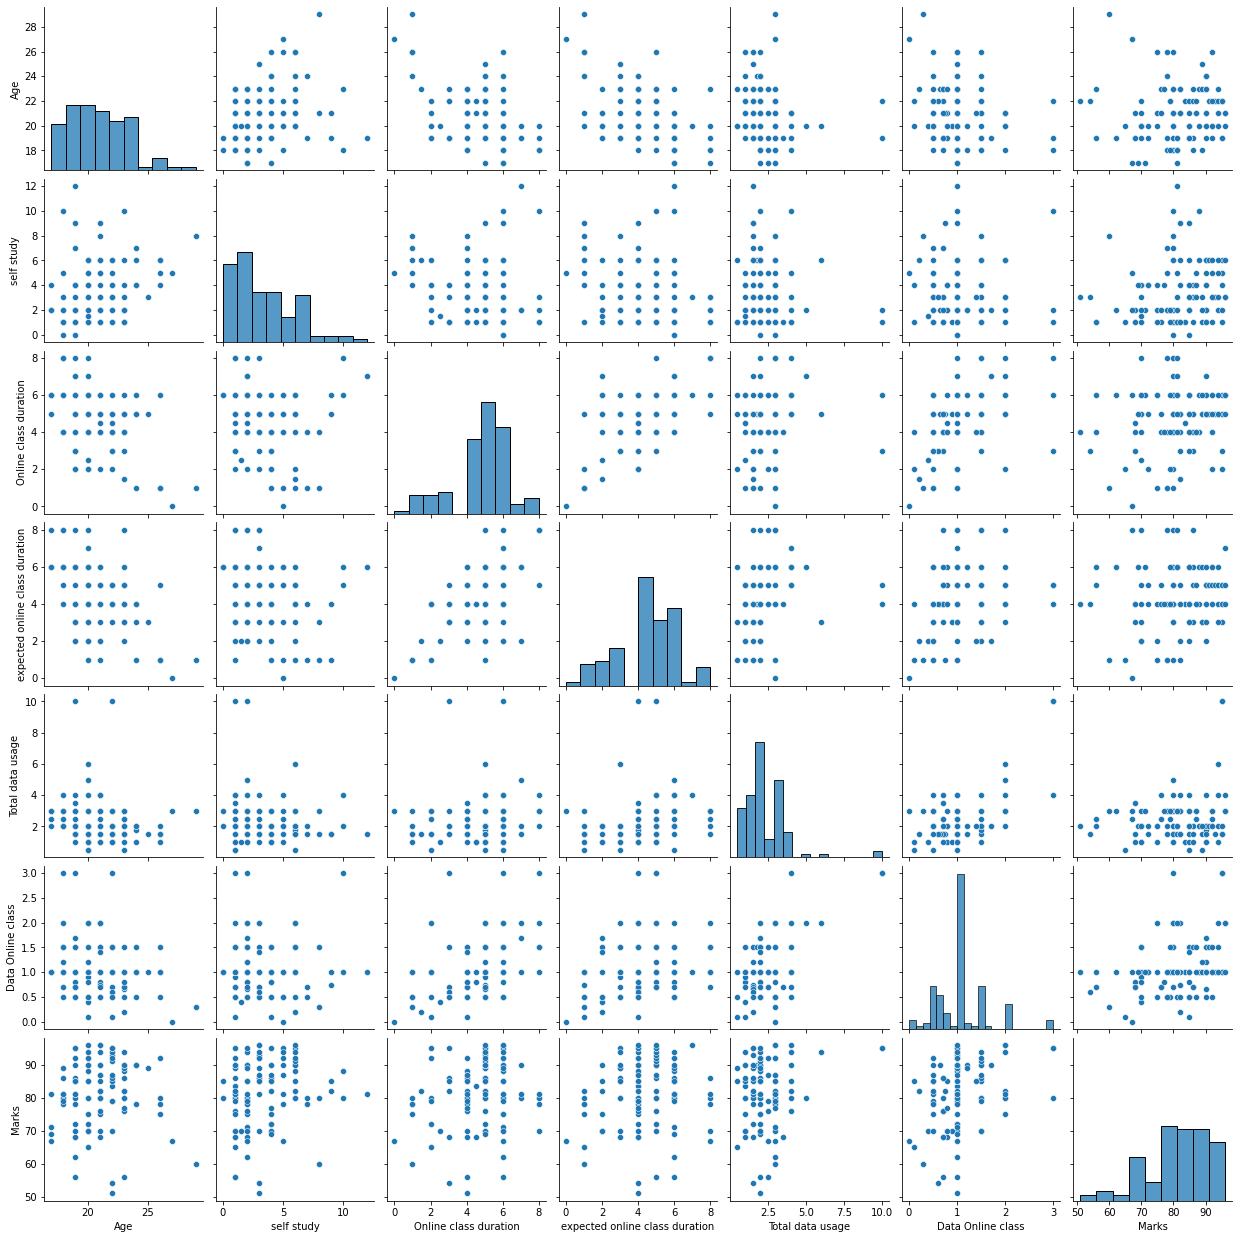

In [71]:
plt.figure(figsize=(50, 50))
sns.pairplot(data);